### On va créer et entrainer un modèle de ML avec la régression Logistique

In [45]:
### Load Import
import pandas as pd
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, classification_report

In [46]:
### Load dataset from Kaggle

import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "WELFake_Dataset.csv"
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "saurabhshahane/fake-news-classification",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

/tmp/ipykernel_446/2796081959.py:7: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


In [47]:
### Visualisation de l'ensemble de données 
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [48]:
#### Analyse descriptive du jeu de données
df.describe()

,Unnamed: 0,label
count,72134.000000,72134.000000
mean,36066.500000,0.514404
std,20823.436496,0.499796
min,0.000000,0.000000
25%,18033.250000,0.000000
50%,36066.500000,1.000000
75%,54099.750000,1.000000
max,72133.000000,1.000000


In [49]:
### Vérification des valeurs manquantes
df.isnull().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [50]:
#### Nettoyge du dataset

df.dropna(inplace=True)

In [51]:
### Revérification des valeurs manquantes
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [52]:
### Sélection des features et du label(étiquette)

### Création d'une nouvelle colonne 'content' contenant le titre et le textedes news 
df['content'] =  df['title'] + " " + df['text']
### Sélection de content comme feature
X = df['content']
Y = df['label']

#### Visualisation du nouveau dataset
df.head()

,Unnamed: 0,title,text,label,content
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"Bobby Jindal, raised Hindu, uses story of Chri..."
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,SATAN 2: Russia unvelis an image of its terrif...
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,About Time! Christian Group Sues Amazon and SP...


In [53]:
#### Séparation des données en ensemble de test et d'entrainement

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [54]:
#### Vectorisation de l'ensemble d'entrainement avec TF-IDF

vectorizer = TfidfVectorizer(stop_words="english")
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [55]:
#### Enfin entrainement du modéle avec la régression logistique

model = LogisticRegression(max_iter=5000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=5000)

##### SAUVEGARDE DU MODELE ET DU VECTEUR TF-IDF

In [56]:
joblib.dump(model,"fake_news_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

['tfidf_vectorizer.pkl']

In [57]:
##### Prédiction et Evaluation du modèle

### Prédire l'ensemble de test
y_pred = model.predict(X_test_tfidf)

### Evaluation du modèle

print(" Accuracy Score: ", accuracy_score(y_test, y_pred))

print("\n Matrice de confusion \n")
print(confusion_matrix(y_test, y_pred))

print("\n Rapport de classification \n")

print(classification_report(y_test, y_pred))


 Accuracy Score:  0.9475817724350014

 Matrice de confusion 

[[6636  445]
 [ 305 6922]]

 Rapport de classification 

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      7081
           1       0.94      0.96      0.95      7227

    accuracy                           0.95     14308
   macro avg       0.95      0.95      0.95     14308
weighted avg       0.95      0.95      0.95     14308



INTERPRETATION DE LA MATRICE DE CONFUSION
6636 fausses news bien détectées comme fausses (👍)

6922 vraies news bien détectées comme vraies (👍)

445 fake news mal classées comme vraies (erreur)

305 fausses news mal classées comme vraies (erreur)

💡 → Le modèle fait très peu d'erreurs, balance bien les deux classes , donc pas de biais fort. 👌

VISUALISATION DE LA MATRICE DE CONFUSION

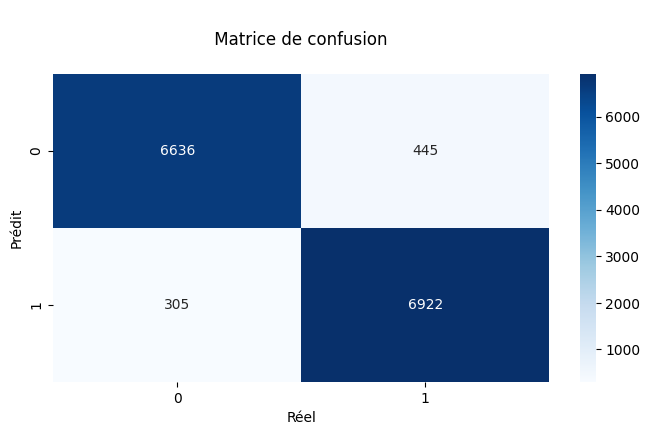

In [58]:
### Affichage de la matrice de confusion

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Réel")
plt.ylabel("Prédit")
plt.title("\n Matrice de confusion \n")
plt.show()

VISUALISATION DE ROC et AUC

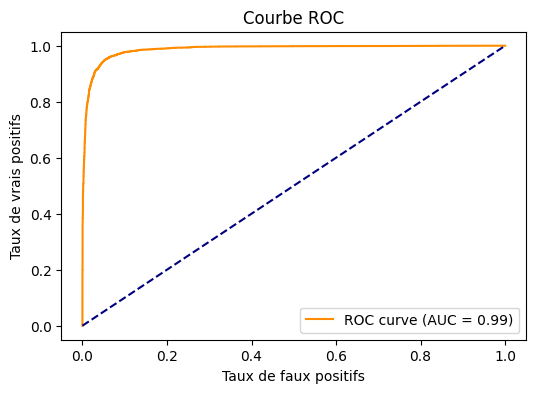

In [59]:
y_probs = model.predict_proba(X_test_tfidf)[:, 1]   # Probabilité d’être classe "1"

fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend()
plt.show()